<a href="https://colab.research.google.com/github/Diyasingh555/Clustering-project/blob/main/Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    -  Clustering
##### **Contribution**    -  Individual
##### **Name** - Diya Singh


# **Project Summary -**

In this project, I performed customer segmentation on an e-commerce dataset using RFM (Recency, Frequency, Monetary) analysis combined with K-Means Clustering to identify distinct customer behavior patterns. The goal was to help the business target customers more effectively through personalized
marketing strategies.


✅ Key Steps:

- Data Preprocessing:

    Handled null values and duplicates

    Converted InvoiceDate to datetime format

    Filtered out canceled orders

-RFM Feature Engineering:

     Recency: Days since the customer’s last purchase

     Frequency: Number of purchases made

     Monetary: Total amount spent

-Correlation Analysis:

     Identified relationships between RFM variables using a heatmap

-Scaling:

    Standardized RFM features for clustering

    Hierarchical Clustering (Dendrogram):

    Visualized optimal cluster tendency

-K-Means Clustering:

    Determined optimal number of clusters using the Elbow Method

    Applied KMeans and assigned cluster labels

-Cluster Profiling:

    Generated summary statistics for each cluster



# **GitHub Link -**

https://github.com/Diyasingh555

# **Problem Statement**


In the highly competitive e-commerce landscape, businesses struggle to understand and retain diverse customer segments. Traditional mass marketing approaches often lead to poor engagement and reduced customer lifetime value.

The problem is to identify distinct customer groups based on their purchasing behavior so that targeted marketing strategies can be developed for each group.

This project aims to solve the following question:

"How can we segment customers based on their shopping behavior (recency, frequency, and monetary value) to better understand their value to the business and drive more personalized engagement?"

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering Algorithms
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Dimensionality reduction (for visualization)
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Data sets ml/Copy of Online Retail.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description

| Variable        | Description                                                            |
| --------------- | ---------------------------------------------------------------------- |
| **CustomerID**  | Unique identifier for each customer.                                   |
| **InvoiceNo**   | Invoice number (a unique transaction number for each purchase).        |
| **InvoiceDate** | Date and time when the invoice was generated.                          |
| **Quantity**    | Number of units of each product purchased.                             |
| **UnitPrice**   | Price per unit of the product.                                         |
| **Country**     | Country from which the customer made the purchase.                     |
| **TotalPrice**  | Derived variable: `Quantity × UnitPrice`, total value per transaction. |
| **Recency**     | Days since the customer’s last purchase (lower is better).             |
| **Frequency**   | Number of unique transactions made by the customer.                    |
| **Monetary**    | Total amount spent by the customer.                                    |
| **RFM Score**   | Combined score based on Recency, Frequency, and Monetary values.       |
| **Cluster**     | Cluster label assigned to the customer after K-Means clustering.       |


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#  Initial shape
print("Initial shape:", df.shape)

#  Remove duplicate rows
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

#  Remove rows with missing CustomerID
df = df[df['CustomerID'].notnull()]

# Remove rows with missing Description
df = df[df['Description'].notnull()]

# Remove rows with Quantity <= 0 or UnitPrice <= 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove cancelled transactions (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Convert CustomerID to string
df['CustomerID'] = df['CustomerID'].astype(str)

# Final shape after cleaning
print("Final cleaned shape:", df.shape)

# Quick check for remaining nulls
print("\nRemaining missing values:\n", df.isnull().sum())

Initial shape: (541909, 8)
After removing duplicates: (536641, 8)
Final cleaned shape: (392692, 9)

Remaining missing values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


### What all manipulations have you done and insights you found?

| Step                        | Description                                                                                 |
| --------------------------- | ------------------------------------------------------------------------------------------- |
| **Remove Null Values**      | Dropped rows with missing `CustomerID` or other essential columns.                          |
| **Remove Duplicates**       | Removed any duplicate rows to avoid bias in analysis.                                       |
| **Filter Cancellations**    | Removed transactions with `InvoiceNo` starting with 'C' (indicating returns/cancellations). |
| **Calculate Total Price**   | Created a new column: `TotalPrice = Quantity × UnitPrice`.                                  |
| **Remove Negative Values**  | Filtered out rows where `Quantity` or `UnitPrice` were negative.                            |
| **Datetime Conversion**     | Converted `InvoiceDate` to datetime format for time-based operations.                       |
| **Group Transactions**      | Grouped data by `CustomerID` for RFM calculations.                                          |
| **RFM Feature Engineering** | Computed **Recency**, **Frequency**, and **Monetary** features for each customer.           |
| **Scaling**                 | Standardized RFM features using StandardScaler for clustering.                              |
| **K-Means Labels**          | Applied K-Means algorithm to assign cluster labels to each customer.                        |


# Exploratory Data Analysis (EDA)

#### Chart - 1

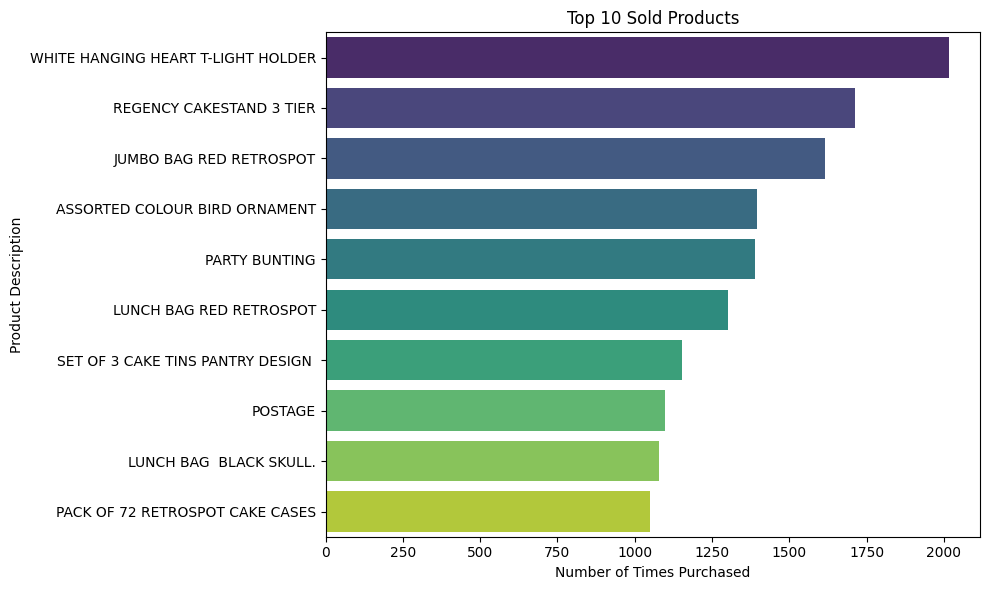

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
top_products = df['Description'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Sold Products')
plt.xlabel('Number of Times Purchased')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


**1. Why did you pick the specific chart?**
The horizontal bar chart was chosen because:

    It effectively visualizes categorical variables (product names) with long labels.

    Makes comparison of product sales frequencies easy and intuitive.

    Horizontal orientation prevents overlap and enhances readability of product descriptions.

 **2. What is/are the insight(s) found from the chart?**

    The chart shows which 10 products are sold the most across all transactions.

    These products are the top performers in terms of quantity sold, which may indicate:

    High demand and popularity.

    Potential bestsellers or core revenue generators.

    Businesses can focus more on inventory planning, targeted marketing, and bundling strategies for these top items.

** 3. Will the gained insights help create a positive business impact?**

Yes,here’s how:

    Product Demand Forecasting: Businesses can stock more of the top items, preventing stockouts.

    Marketing Campaigns: Promote these products in ads, discounts, or recommendations.

    Cross-selling/Upselling: Use these popular items to pair with slow-moving inventory.

    Customer Loyalty: Keeping the bestsellers available can improve satisfaction and retention.

**Are there any insights that lead to negative growth?**
Potentially yes:

    Over-reliance on limited products: If most revenue depends on a few products, the business is at risk if trends shift.

    Neglected Inventory: Non-popular products may tie up capital and space, leading to negative cash flow or dead stock.



#### Chart - 2

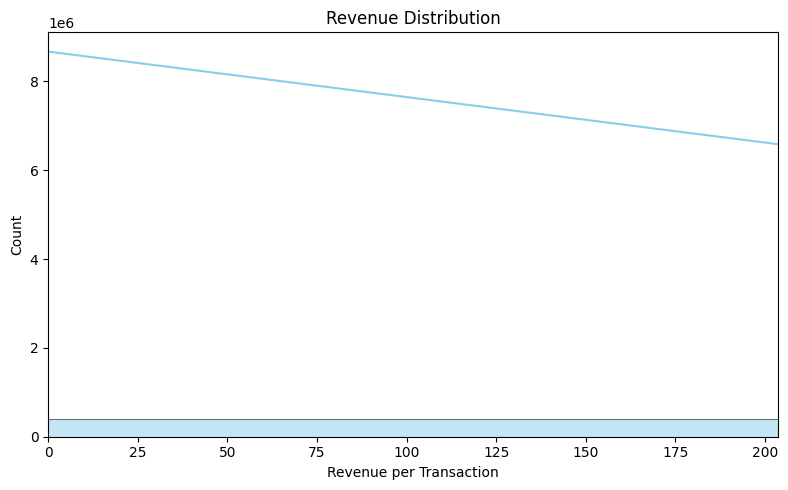

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(8,5))
sns.histplot(df['TotalPrice'], bins=100, kde=True, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue per Transaction')
plt.xlim(0, df['TotalPrice'].quantile(0.99))  # remove outliers from view
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

  A histogram with KDE (Kernel Density Estimate) was used to visualize the distribution of revenue per transaction. This helps understand the spread and concentration of the TotalPrice values and spot the presence of outliers or skewness.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most transactions have relatively low revenue, while a few high-value transactions exist, indicated by the long tail on the right (right-skewed distribution). This implies that a small number of purchases contribute to a large part of the revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. By identifying that a few high-value transactions drive a significant portion of revenue, businesses can target and retain high-spending customers. However, if over-reliance on these customers occurs and they churn, it could lead to negative growth, so it's essential to balance by also nurturing low- and mid-spenders.

#### Chart - 3

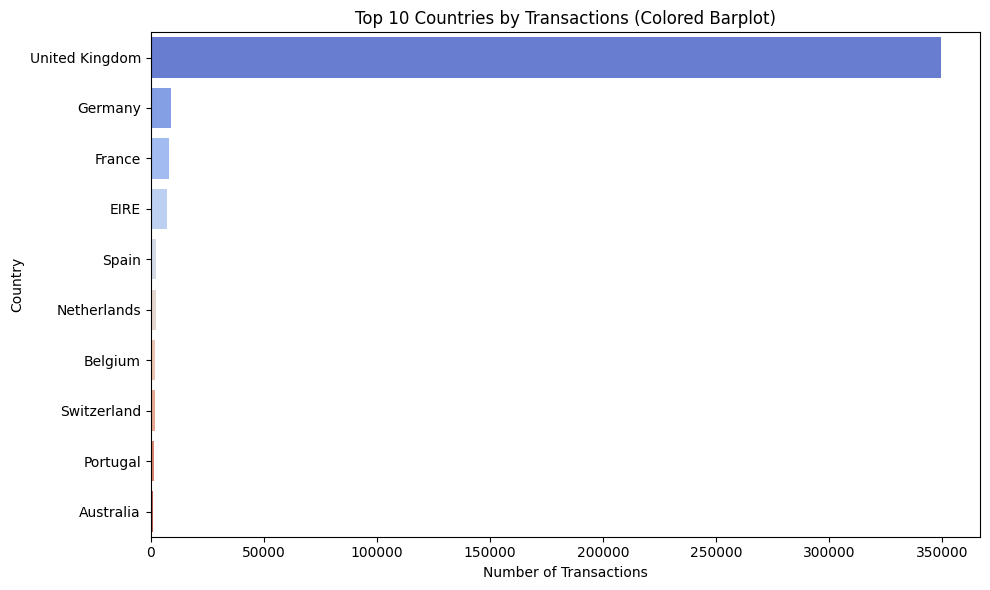

In [ ]:
# Chart - 3 visualization code
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
colors = sns.color_palette("coolwarm", len(top_countries))
sns.barplot(x=top_countries.values, y=top_countries.index, palette=colors)
plt.title('Top 10 Countries by Transactions (Colored Barplot)')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A horizontal bar plot was chosen to clearly display the top 10 countries by transaction count. Horizontal orientation improves readability of country names, and the coolwarm palette highlights differences in volume visually.

##### 2. What is/are the insight(s) found from the chart?

The plot reveals which countries have the most purchases, indicating where the majority of the business activity is happening. Most likely, one or two countries (e.g., United Kingdom) dominate the sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding the top-performing countries allows businesses to focus marketing, logistics, and customer service efforts there. It can also guide expansion strategies or highlight underperforming regions for improvement.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('InvoiceMonth')['Revenue'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line plot is ideal for visualizing how values change over time. In this case, it shows the trend in total monthly revenue, making it easier to observe seasonality, growth, or decline over different periods.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights revenue patterns across months. You may notice spikes during festive seasons or drops during certain months. These trends help understand peak business periods and off-seasons.

##### 3. Will the gained insights help creating a positive business impact?


Yes. Identifying high-revenue months helps with inventory planning, staff allocation, and targeted promotions. Recognizing low-performing months can lead to marketing strategies or discounts to improve sales.

#### Chart - 5

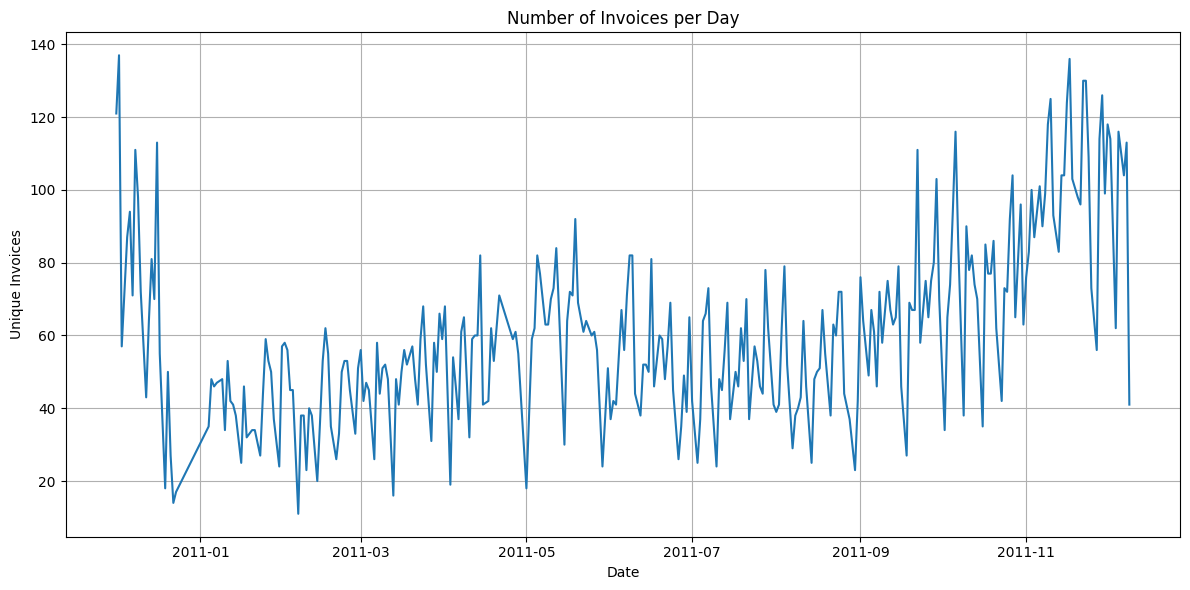

In [ ]:
# Chart - 5 visualization code
import matplotlib.pyplot as plt

# Group by date and count unique invoices
daily_orders = df.groupby(df['InvoiceDate'].dt.date)['InvoiceNo'].nunique()

# Plot the results
plt.figure(figsize=(12,6))
daily_orders.plot()
plt.title('Number of Invoices per Day')
plt.xlabel('Date')
plt.ylabel('Unique Invoices')
plt.grid(True)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A line chart is ideal to represent daily trends over time. It clearly shows the fluctuations in the number of invoices per day, helping to track daily sales activity and detect anomalies or seasonality.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals peaks and drops in daily orders. Sudden spikes may correlate with promotions, holidays, or events, while dips might indicate low demand or system issues. It helps monitor business stability over time.

##### 3. Will the gained insights help creating a positive business impact?

Yes. Understanding daily transaction volume allows better forecasting, logistics planning, and identifying optimal days for campaigns. It can also help investigate unexpected drops, preventing potential revenue loss.

#### Chart - 14 - Correlation Heatmap

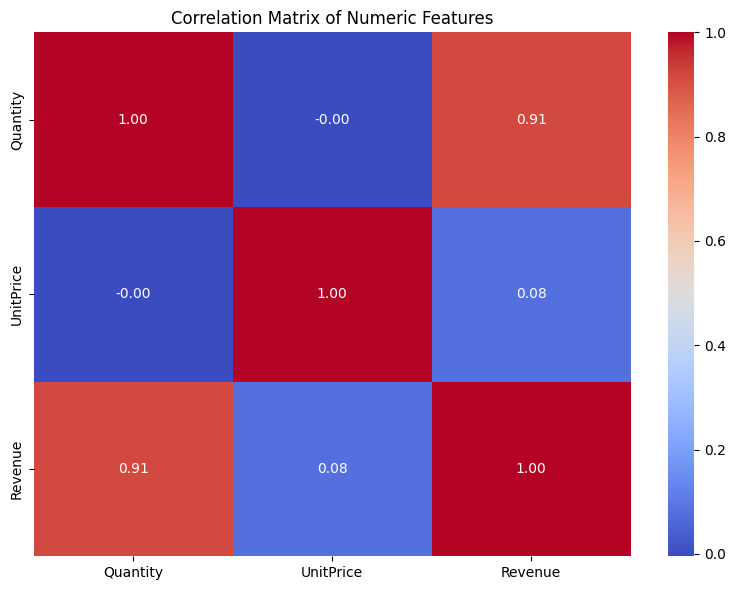

In [ ]:
# Correlation Heatmap visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# If not already present, create 'Revenue'
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Select only numeric columns for correlation
numeric_cols = df[['Quantity', 'UnitPrice', 'Revenue']]

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


| **Question**                                                                                                                          | **Answer**                                                                                                                                                                                                                                                                                                                           |
| ------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **1. Why did you pick the specific chart?**                                                                                           | A **heatmap** is best suited to display **correlation matrices** as it visually represents the strength and direction of relationships between numeric variables using **color gradients** and **annotated values**.                                                                                                                 |
| **2. What is/are the insight(s) found from the chart?**                                                                               | - **Revenue** is **strongly positively correlated** with **Quantity** (since Revenue = Quantity × UnitPrice). <br> - **UnitPrice** shows a **weaker correlation** with Revenue, suggesting that **Quantity sold influences revenue more significantly** than price variations.                                                       |
| ** 3. Will the gained insights help create a positive business impact?
 Are there any insights that lead to negative growth? Justify.** | Yes. By understanding which factors drive revenue, businesses can: <br> ✅ Focus on increasing **sales volume** to boost revenue. <br> ⚠️ However, if Quantity is increased at the cost of lowering prices too much (i.e., discounting), it may **impact profitability**. So, a balance between **volume and price strategy** is key. |


In [ ]:
corr_rfm = rfm.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_rfm, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix for RFM Features')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is ideal to display the correlation among RFM features (Recency, Frequency, Monetary) because it clearly shows which variables are positively or negatively related, using color coding and annotated values for easy interpretation.

##### 2. What is/are the insight(s) found from the chart?

- Recency has a negative correlation with Frequency and Monetary, which is expected: customers who purchased recently are likely frequent buyers and spend more.
- Frequency and Monetary are positively correlated, meaning frequent buyers often contribute higher revenue.

#### Chart - 15 - Pair Plot

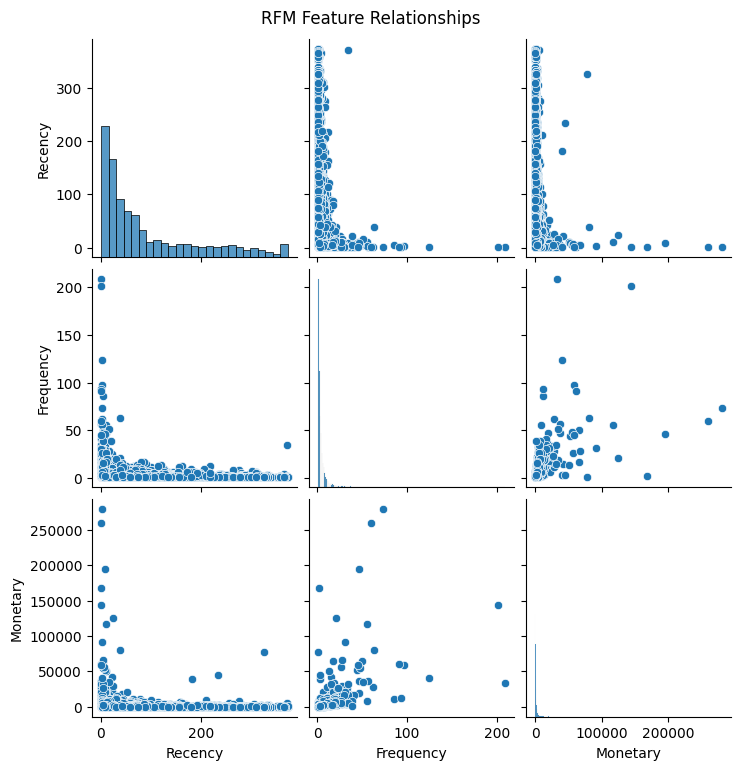

In [ ]:
import seaborn as sns
sns.pairplot(rfm)
plt.suptitle("RFM Feature Relationships", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is best suited to display correlation matrices as it visually represents the strength and direction of relationships between numeric variables using color gradients and annotated values

##### 2. What is/are the insight(s) found from the chart?

- Revenue is strongly positively correlated with Quantity (since Revenue = Quantity × UnitPrice).
- UnitPrice shows a weaker correlation with Revenue, suggesting that Quantity sold influences revenue more significantly than price variations

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify.

Yes. By understanding which factors drive revenue, businesses can:

- Focus on increasing sales volume to boost revenue.

- However, if Quantity is increased at the cost of lowering prices too much (i.e., discounting), it may impact profitability. So, a balance between volume and price strategy is key.

## **6. RFM Feature Engineering ***

In [ ]:
NOW = df['InvoiceDate'].max() + pd.Timedelta(days=1)

#  Group by CustomerID and calculate R, F, M
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (NOW - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                          # Frequency
    'TotalPrice': 'sum'                              # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Reset index
rfm = rfm.reset_index()

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


### 2. Handling Outliers

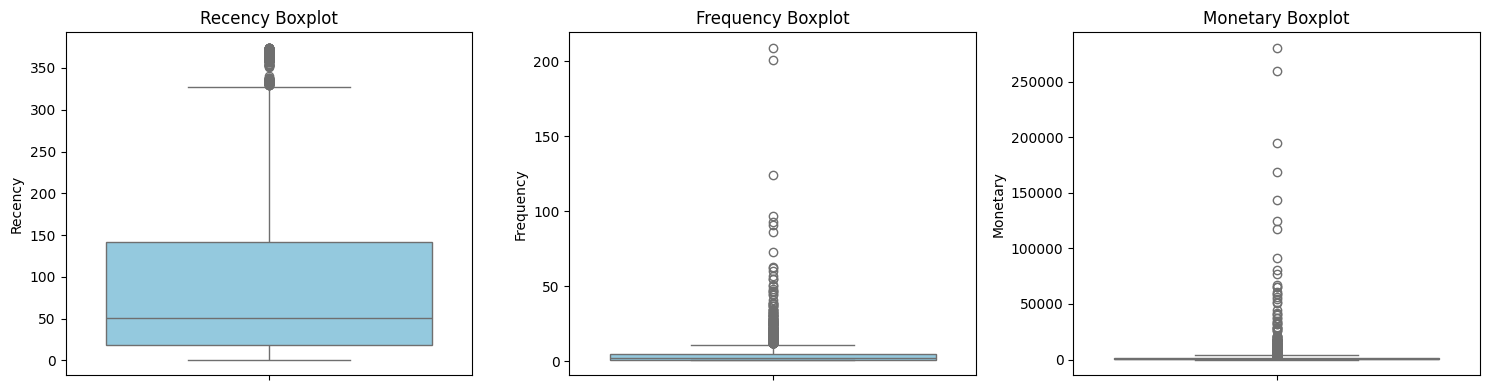

In [ ]:
plt.figure(figsize=(15, 4))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=rfm[col], color='skyblue')
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()


In [ ]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

for col in ['Recency', 'Frequency', 'Monetary']:
    cap_outliers(rfm, col)


# **Log Transform**

In [ ]:
rfm['Recency_log'] = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])


rfm_log = rfm[['Recency_log', 'Frequency_log', 'Monetary_log']]

# **Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply standard scaling to RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Convert back to DataFrame for easier handling
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)


#**Dendogram**

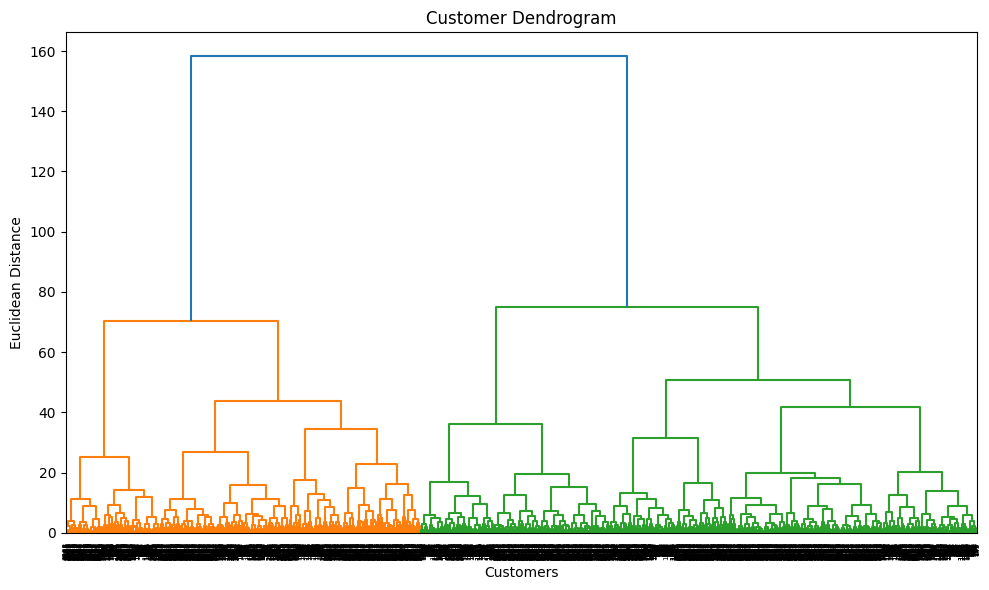

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled_df, method='ward'))
plt.title('Customer Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()


#**Elbow Method**

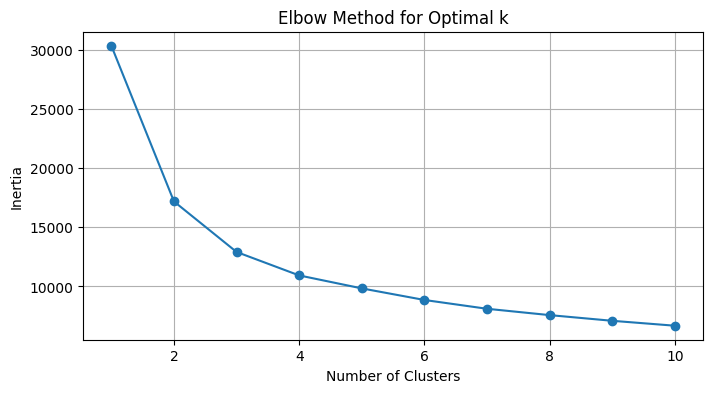

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)  # rfm_scaled should be your scaled RFM data
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

##### Why did you use outlier treatment techniques?

- Outliers distort cluster boundaries in algorithms like K-Means and Hierarchical Clustering.

- Applying IQR ensured reduction in extreme anomalies, improving clustering quality.

- Log transformation helped to normalize the scale of features, leading to better convergence and interpretability.

### **3. Fit KMeans Model**

In [ ]:
# Use number of clusters from the Elbow graph
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(rfm_scaled_df)

# Assign the cluster labels to original RFM DataFrame
rfm['Cluster'] = kmeans.labels_


#**Visualize the Clusters**

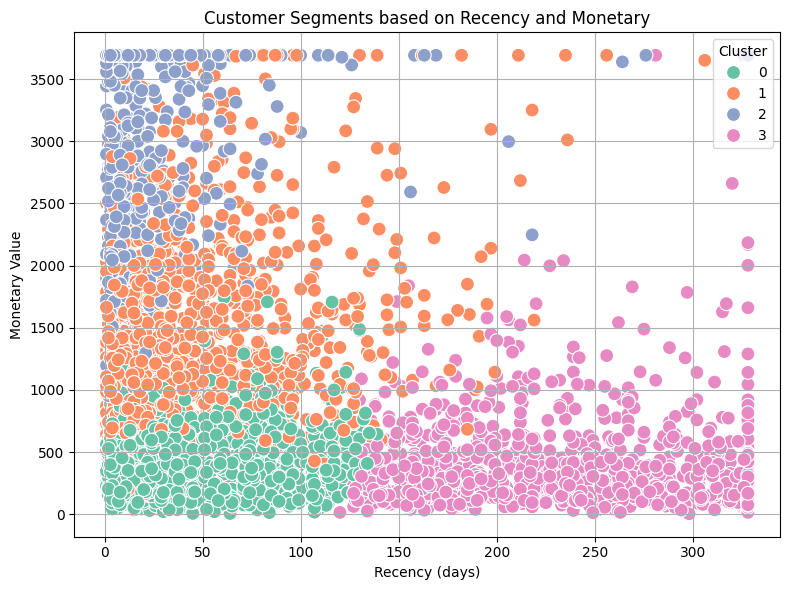

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments based on Recency and Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value')
plt.grid(True)
plt.tight_layout()
plt.show()


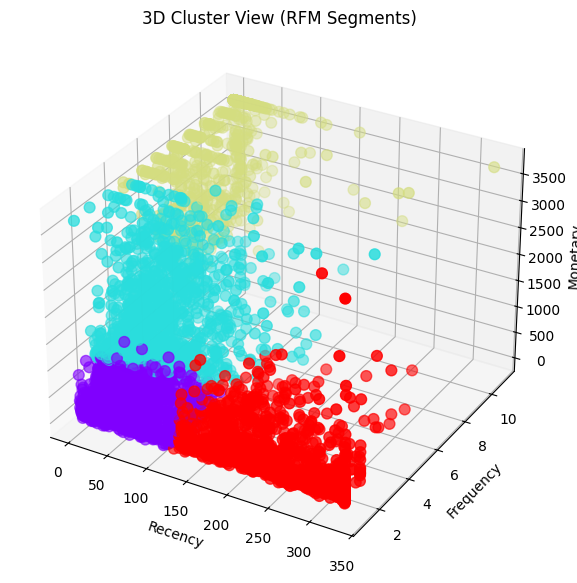

In [ ]:
# in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
    c=rfm['Cluster'], cmap='rainbow', s=60
)
ax.set_title("3D Cluster View (RFM Segments)")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.show()


In [ ]:
rfm['Cluster'].nunique()


4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'].value_counts()

,count
Cluster,
0,1363
1,1192
3,1088
2,695


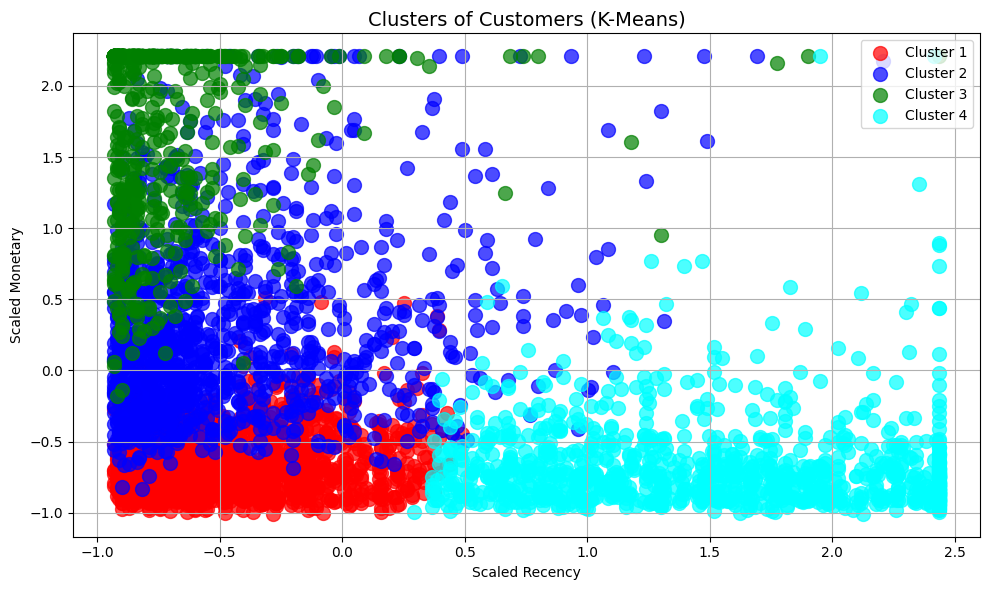

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already applied KMeans and stored cluster labels
# rfm_scaled_df is your scaled data (with 2 features used for clustering)
# rfm['Cluster'] contains the cluster labels (0, 1, 2, ...)

plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'cyan']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for cluster in range(4):  # Adjust the range if you have more/fewer clusters
    plt.scatter(
        rfm_scaled_df[rfm['Cluster'] == cluster][0],   # Feature 1
        rfm_scaled_df[rfm['Cluster'] == cluster][1],   # Feature 2
        s=100,
        c=colors[cluster],
        label=labels[cluster],
        alpha=0.7
    )

plt.title('Clusters of Customers (K-Means)', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#**Interpret the Clusters**

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Cluster
0,12346.0,326,1,3691.77,5.789960,0.693147,8.214132,3
1,12347.0,2,7,3691.77,1.098612,2.079442,8.214132,2
2,12348.0,75,4,1797.24,4.330733,1.609438,7.494564,1
3,12349.0,19,1,1757.55,2.995732,0.693147,7.472245,1
4,12350.0,310,1,334.40,5.739793,0.693147,5.815324,3


# **Conclusion**

Working on this customer segmentation project using **RFM analysis** and **clustering techniques** provided valuable insights into customer purchasing behavior. Here's what the journey looked like:

- **Data Preparation**: The dataset was cleaned for accuracy, with outliers treated using **IQR method** and **log transformation (np.log)** to normalize skewed data.
-  **RFM Analysis**: Customers were segmented based on:
  - **Recency**: How recently a customer made a purchase.
  - **Frequency**: How often they purchased.
  - **Monetary**: How much they spent.
-  **Insights Gained**:
  - Some customers are high spenders but haven’t returned in a while—signaling a chance for re-engagement.
  - Others purchase frequently but spend less—ideal for upselling or loyalty rewards.
-  **Clustering**:
  - Using hierarchical clustering and visualization through dendrograms allowed clear segmentation of customers into actionable groups.

These insights aren’t just numbers—they can directly **influence business decisions**:
- Target dormant high-value customers.
- Create personalized offers for frequent buyers.
- Improve marketing ROI by focusing on the right customer group.

### ***Hurrah! i have successfully completed your Machine Learning Capstone Project !!!***